                                         Credit Card Fraud Detection

Build a machine learning model to identify fraudulent credit card transactions.

Preprocess and normalize the transaction data, handle class imbalance issues, and split the dataset into training and testing sets.

Train a classification algorithm, such as logistic regression or random forests, to classify transactions as fraudulent or genuine.

Evaluate the model's performance using metrics like precision, recall and F1-score, and consider techniques like oversampling or
undersampling for improving results.

In [62]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [63]:
warnings.filterwarnings('ignore')

In [64]:
# Import CSV File

df = pd.read_csv(r'D:\CodSoft\Task5_Credit_Card_Fraud_Detection\creditcard.csv')

In [65]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


# 1. Understanding of Data

In [66]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In this datset, target column is 'Class'.

In [67]:
# Shape of the dataset

df.shape

(284807, 31)

Total number of rows: 284807
    
Total number of columns: 31

In [68]:
# Columns Information

df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

1. Time: Number of seconds elapsed between this transaction and the first transaction in the dataset.

    
2. V1 - V28: Result of a PCA Dimensionality reduction to protect user identities and sensitive features.
    

3. Amount: Transaction amount
    

4. Class: Fraud or not (1 = Fraud, 0 = Not Fraud)

In [69]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# 2. Data Cleaning

# Check for null values

In [70]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

There are no null values in our dataset.

# Check for duplicates

In [71]:
df.duplicated().sum()

1081

There are 1081 duplicate rows in our dataset. So, we need to remove them.

In [72]:
df = df.drop_duplicates()

In [73]:
df.reset_index(inplace = True)

In [74]:
df.duplicated().sum()

0

In [75]:
df.drop('index', axis = 1, inplace = True)

In [76]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283721,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
283722,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
283723,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
283724,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


# Check for datatypes

In [77]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

# 3. Explorartory Data Analysis:

# Class

([<matplotlib.axis.XTick at 0x249eec44890>,
 [Text(0, 0, 'Legitimate'), Text(1, 0, 'Fraud')])

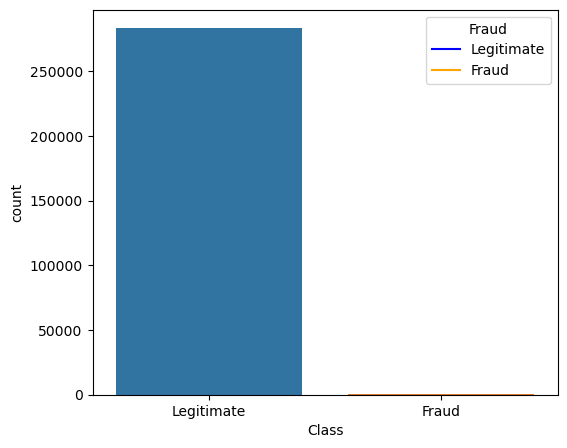

In [78]:
plt.figure(figsize = (6,5))
sns.countplot(x = 'Class', data = df)

legends = [plt.Line2D([0], [0], color = 'blue'), plt.Line2D([0], [0], color = 'orange')]
plt.legend(legends, ['Legitimate', 'Fraud'], title = 'Fraud')
plt.xticks([0,1], ['Legitimate', 'Fraud'])

In [79]:
df['Class'].value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

Analysis:

      1. Data is highly imabalanced.
      
      2. We will perform downsampling to rectify this problem.

# Amount

<Axes: ylabel='Amount'>

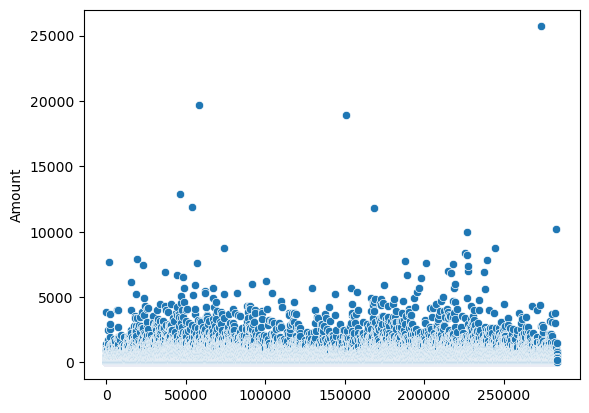

In [80]:
sns.scatterplot(df['Amount'])

In [81]:
df['Amount'].max()

25691.16

Analysis:

    1. The majority of transactions are less than 5,000.
    
    2. In our dataset, the maximum "amount" is 25691.16.
    

# Amount with Time

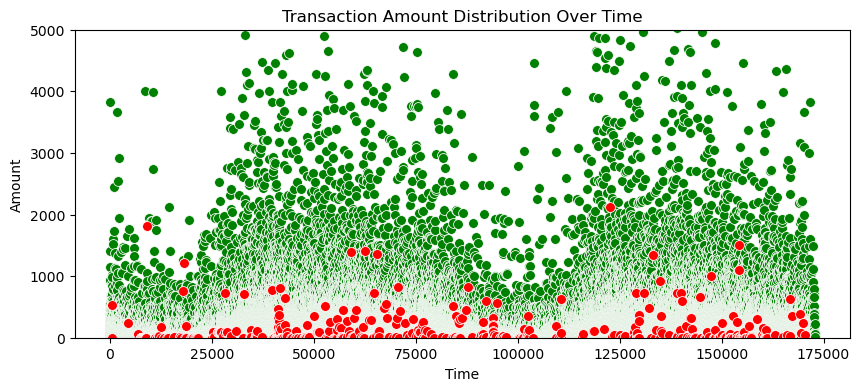

In [82]:
fig, ax = plt.subplots(figsize=(10, 4))

sns.scatterplot(data = df[df['Class'] == 0], x = 'Time', y = 'Amount', color = 'green', s = 50)
plt.ylim(0, 5000)


sns.scatterplot(data = df[df['Class'] == 1], x='Time', y = 'Amount', color = 'red', s = 50)

ax.set_title("Transaction Amount Distribution Over Time")

plt.show()


# Time and Class

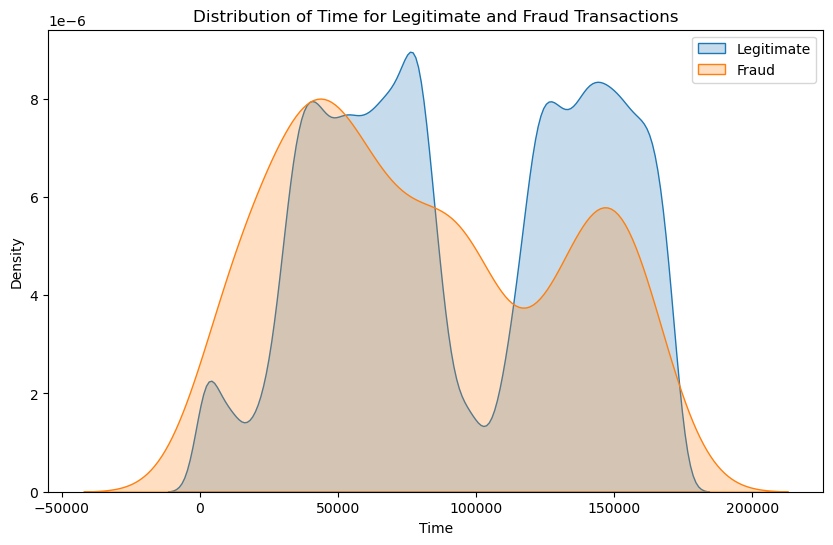

In [83]:
plt.figure(figsize=(10, 6))

sns.kdeplot(df[df['Class'] == 0]['Time'], label = 'Legitimate', fill = True)
sns.kdeplot(df[df['Class'] == 1]['Time'], label = 'Fraud', fill = True)

plt.xlabel('Time')
plt.ylabel('Density')
plt.title('Distribution of Time for Legitimate and Fraud Transactions')
plt.legend()
plt.show()

# 4. Data Preprocessing

In Data Preprocessing, we will perorm:
    
    1. Check for outliers
    2. Check correlation
    3. Split data in train and test
    4. Apply standard scaling
    5. Perform downsampling

# Outliers

In [84]:
df1 = df.copy(deep = True)

In [85]:
def outliers_box(d_f,col_):
    q1 = np.quantile(d_f[col_],.25)
    q2 = np.quantile(d_f[col_],.75)
    iqr = q2-q1
    maxima_ = q2 + 1.5*iqr
    minima_ = q1 - 1.5*iqr
    
    if((d_f[col_].max() > maxima_) or (d_f[col_].min() < minima_)):
        print(col_,'------- outliers present')
    else:
        print(col_,'------- outliers not present')
        
    return(minima_,maxima_)

In [86]:
def out_remove(d_f,col_):
    x1,y1 = outliers_box(d_f,col_)
    df1.drop(index= d_f[(d_f[col_]<x1) | (d_f[col_]>y1)].index, axis = 0, inplace =True)

In [87]:
for i in df1.columns:
    out_remove(df1,i)
    df1.reset_index(drop=True,inplace = True)

Time ------- outliers not present
V1 ------- outliers present
V2 ------- outliers present
V3 ------- outliers present
V4 ------- outliers present
V5 ------- outliers present
V6 ------- outliers present
V7 ------- outliers present
V8 ------- outliers present
V9 ------- outliers present
V10 ------- outliers present
V11 ------- outliers present
V12 ------- outliers present
V13 ------- outliers present
V14 ------- outliers present
V15 ------- outliers present
V16 ------- outliers present
V17 ------- outliers present
V18 ------- outliers present
V19 ------- outliers present
V20 ------- outliers present
V21 ------- outliers present
V22 ------- outliers present
V23 ------- outliers present
V24 ------- outliers present
V25 ------- outliers present
V26 ------- outliers present
V27 ------- outliers present
V28 ------- outliers present
Amount ------- outliers present
Class ------- outliers present


In [88]:
df1.shape

(109819, 31)

In [89]:
df.shape

(283726, 31)

* Upon eliminating the anomalies, 61.29% of the data was eliminated.Therefore, we won't eliminate the outliers in this instance. 

# Check Correlation

In [90]:
df.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.117927,-0.010556,-0.422054,-0.105845,0.173223,-0.063279,0.085335,-0.038203,-0.007861,...,0.045913,0.143727,0.051474,-0.015954,-0.233262,-0.041818,-0.005171,-0.009305,-0.010559,-0.012359
V1,0.117927,1.000000,0.006875,-0.008112,0.002257,-0.007036,0.000413,-0.009173,-0.001168,0.001828,...,0.002818,-0.001436,-0.001330,-0.000723,-0.000222,-0.000684,-0.015706,-0.004861,-0.230105,-0.094486
V2,-0.010556,0.006875,1.000000,0.005278,-0.001495,0.005210,-0.000594,0.007425,0.002899,-0.000274,...,-0.004897,0.001237,-0.003855,0.000701,-0.001569,0.000253,0.007555,0.001611,-0.533428,0.084624
V3,-0.422054,-0.008112,0.005278,1.000000,0.002829,-0.006879,-0.001511,-0.011721,-0.001815,-0.003579,...,0.003500,-0.000275,0.000449,-0.000072,0.000425,-0.000094,-0.007051,-0.000134,-0.212410,-0.182322
V4,-0.105845,0.002257,-0.001495,0.002829,1.000000,0.001744,-0.000880,0.004657,0.000890,0.002154,...,-0.001034,0.000115,0.000732,-0.000120,0.000162,0.000777,0.001322,0.000231,0.099514,0.129326
V5,0.173223,-0.007036,0.005210,-0.006879,0.001744,1.000000,-0.000938,-0.008709,0.001430,-0.001213,...,0.001622,-0.000559,0.001183,0.000198,0.000069,0.000390,-0.005798,-0.000820,-0.387685,-0.087812
V6,-0.063279,0.000413,-0.000594,-0.001511,-0.000880,-0.000938,1.000000,0.000436,0.003036,-0.000734,...,-0.002134,0.001104,-0.000755,0.001202,0.000697,-0.000028,0.000289,0.000925,0.216389,-0.043915
V7,0.085335,-0.009173,0.007425,-0.011721,0.004657,-0.008709,0.000436,1.000000,-0.006419,-0.004921,...,0.009010,-0.002280,0.003303,-0.000384,-0.000072,0.000624,-0.004537,0.001657,0.400408,-0.172347
V8,-0.038203,-0.001168,0.002899,-0.001815,0.000890,0.001430,0.003036,-0.006419,1.000000,0.001038,...,0.018892,-0.006156,0.004994,0.000113,0.000011,-0.001407,0.000613,-0.000099,-0.104662,0.033068
V9,-0.007861,0.001828,-0.000274,-0.003579,0.002154,-0.001213,-0.000734,-0.004921,0.001038,1.000000,...,0.000679,0.000785,0.000677,-0.000103,-0.000275,0.001253,0.008221,0.005591,-0.044123,-0.094021


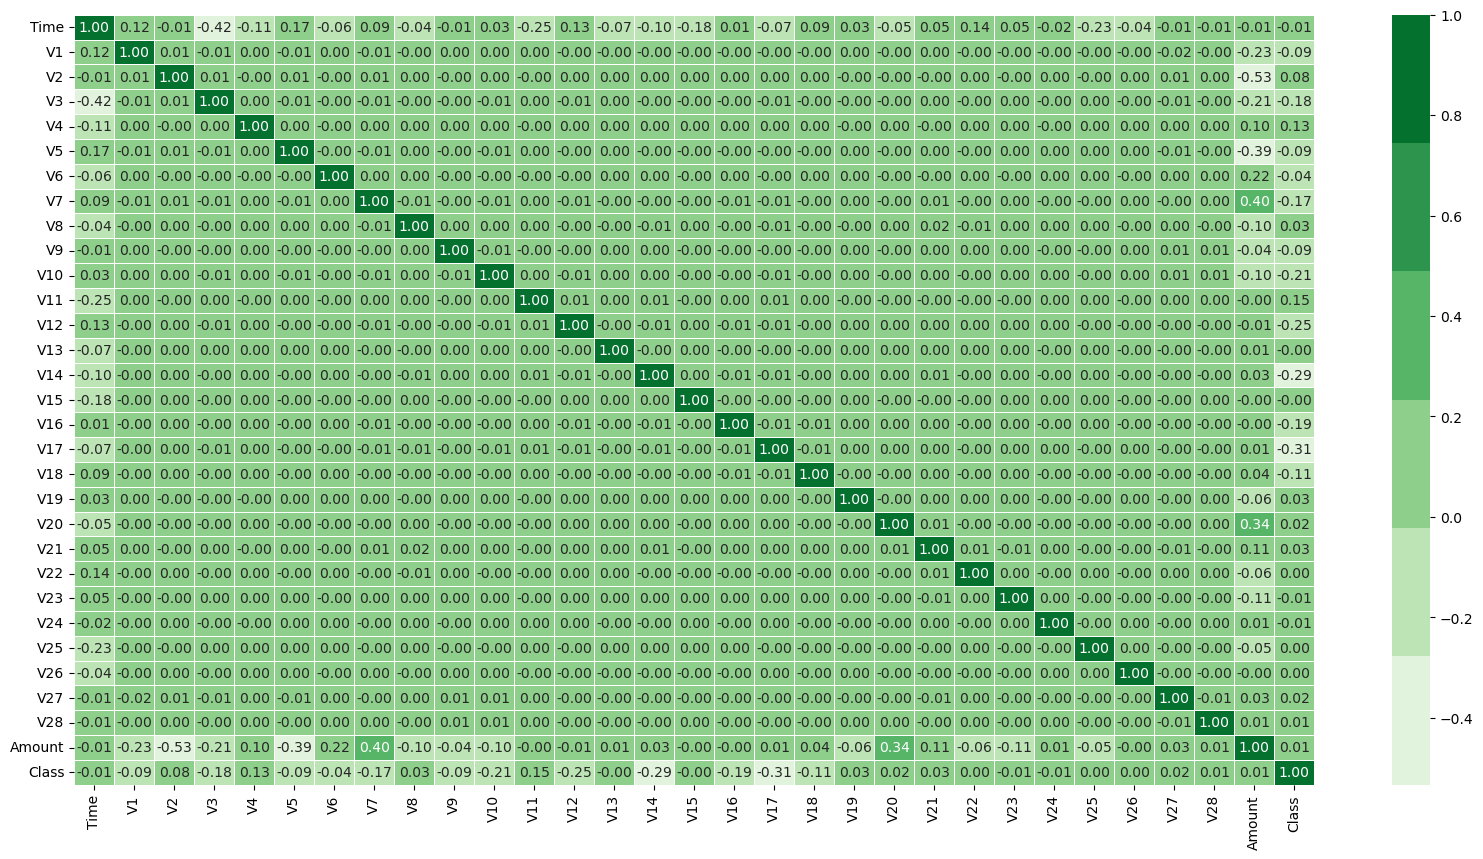

In [91]:
plt.figure(figsize = (20, 10))
sns.heatmap(df.corr(), cmap = sns.color_palette("Greens"), annot = True, fmt = ".2f", linewidths = 0.5)
plt.show()

# Downsampling

In [92]:
from sklearn.utils import resample

In [93]:
downsample = resample(df[df['Class'] == 0], replace = True, n_samples = 473, random_state = 20)

In [94]:
new_df = pd.concat([downsample, df[df['Class'] == 1]])

In [95]:
new_df.reset_index(inplace = True)

In [96]:
new_df.drop('index', axis = 1, inplace = True)

In [97]:
new_df['Class'].value_counts()

Class
0    473
1    473
Name: count, dtype: int64

Now, we have the balanced data.

# Standard Scaling

In [98]:
from sklearn.preprocessing import StandardScaler

In [99]:
scale = new_df.drop('Class', axis = 1)

In [100]:
ss = StandardScaler()

In [101]:
scaled_data = ss.fit_transform(scale)

In [102]:
scaled_df = pd.DataFrame(scaled_data, columns = scale.columns)

In [103]:
scaled_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.981663,-0.217325,-1.240853,0.870124,-0.631197,1.181493,-0.993200,0.235364,-0.086336,0.470293,...,-0.001870,-0.165573,-0.837706,0.186327,0.425170,0.181720,-0.067438,-0.609649,0.767960,-0.419379
1,1.126252,0.290369,-0.358020,0.430771,-1.509223,0.482860,-0.291438,0.634432,-0.103585,-0.429442,...,-0.224585,0.162405,1.162590,-0.308166,-0.493440,0.750242,-0.074560,-0.217160,-0.052829,-0.215949
2,-1.027648,0.603634,-0.519570,0.544212,-0.285190,0.304228,0.203055,0.524056,-0.139162,0.648842,...,-0.236792,-0.080441,-0.011599,-0.148569,0.267316,0.988555,-0.540644,-0.111855,-0.011383,0.071456
3,0.752873,-0.191522,-0.548372,0.418030,-0.941296,0.752774,0.196026,0.645277,-0.211441,0.926040,...,-1.393405,-0.416108,-0.263420,0.452717,0.357730,0.495948,-0.401853,-1.178854,0.301973,-0.279336
4,-0.196309,0.653489,-0.260240,0.488487,-0.309560,0.387603,-0.302680,0.532667,-0.194643,0.467971,...,-0.251695,-0.135355,-0.098919,-0.083211,0.615569,1.033127,-0.734273,-0.063893,0.064370,-0.419337


# Train Test Split

In [104]:
X = scaled_df
y = new_df['Class']

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 115)

# 5. Model Building

# Scorecard Function

In [106]:
df_scorecard = pd.DataFrame(columns = ['Model_name', 'Accuracy_Score_train', 'Precision_Score_train', 'Recall_Score_train', 'F1_Score_train', 'Accuracy_Score_test', 'Precision_Score_test', 'Recall_Score_test', 'F1_Score_test'])

In [107]:
def score_card(d_f, model_name, y_pred, y_test, x_pred, y_train):
    metrics_dict = {
        'Model_name': model_name,
        'Accuracy_Score_train': accuracy_score(y_train, x_pred),
        'Precision_Score_train': precision_score(y_train, x_pred, average='macro'),
        'Recall_Score_train': recall_score(y_train, x_pred, average='macro'),
        'F1_Score_train': f1_score(y_train, x_pred, average='macro'),
        'Accuracy_Score_test': accuracy_score(y_test, y_pred),
        'Precision_Score_test': precision_score(y_test, y_pred, average='macro'),
        'Recall_Score_test': recall_score(y_test, y_pred, average='macro'),
        'F1_Score_test': f1_score(y_test, y_pred, average='macro')
    }

    dfx = pd.concat([d_f, pd.DataFrame(metrics_dict, index=[0])], ignore_index=True)
    return dfx

# 1. Logistic Regression

In [108]:
from sklearn.linear_model import LogisticRegression

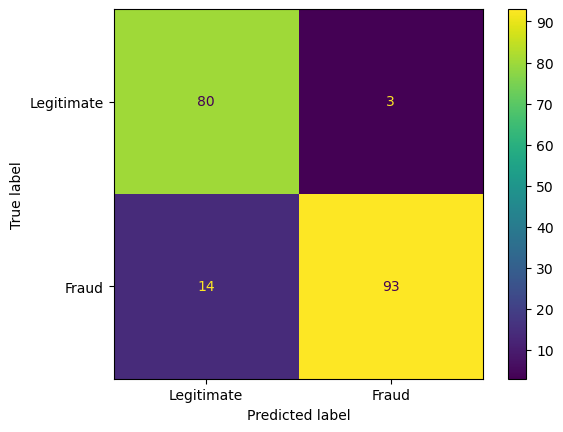

In [109]:
lr = LogisticRegression(solver = 'liblinear', penalty = 'l1')
model_lr = lr.fit(X_train, y_train)
ypred_lr = model_lr.predict(X_test)
ypred_lr_train = model_lr.predict(X_train)
cm_lr = confusion_matrix(y_test, ypred_lr)
(ConfusionMatrixDisplay(confusion_matrix = cm_lr, display_labels = ['Legitimate', 'Fraud'])).plot()

In [110]:
df101 = score_card(df_scorecard, 'Logistic Regression', ypred_lr, y_test, ypred_lr_train, y_train)
df101

,Model_name,Accuracy_Score_train,Precision_Score_train,Recall_Score_train,F1_Score_train,Accuracy_Score_test,Precision_Score_test,Recall_Score_test,F1_Score_test
0,Logistic Regression,0.949735,0.951628,0.948844,0.949565,0.910526,0.909907,0.916507,0.910105


# 2. Decision Tree Classifier: Entropy

In [111]:
from sklearn.tree import DecisionTreeClassifier

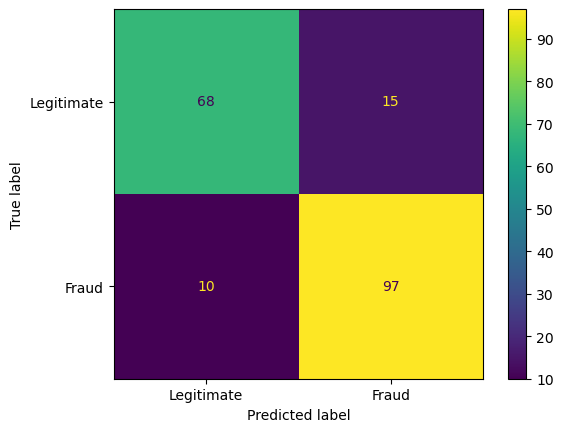

In [112]:
dtc_en = DecisionTreeClassifier(criterion = 'entropy')
model_en = dtc_en.fit(X_train, y_train)
ypred_en = model_en.predict(X_test)
ypred_en_train = model_en.predict(X_train)
cm_en = confusion_matrix(y_test, ypred_en)
(ConfusionMatrixDisplay(confusion_matrix = cm_en, display_labels = ['Legitimate', 'Fraud'])).plot()

In [113]:
df102 = score_card(df101, 'Decision Tree: Entropy', ypred_en, y_test, ypred_en_train, y_train)
df102

,Model_name,Accuracy_Score_train,Precision_Score_train,Recall_Score_train,F1_Score_train,Accuracy_Score_test,Precision_Score_test,Recall_Score_test,F1_Score_test
0,Logistic Regression,0.949735,0.951628,0.948844,0.949565,0.910526,0.909907,0.916507,0.910105
1,Decision Tree: Entropy,1.000000,1.000000,1.000000,1.000000,0.868421,0.868933,0.862910,0.865283


# 3. Decision Tree Classifier: Gini

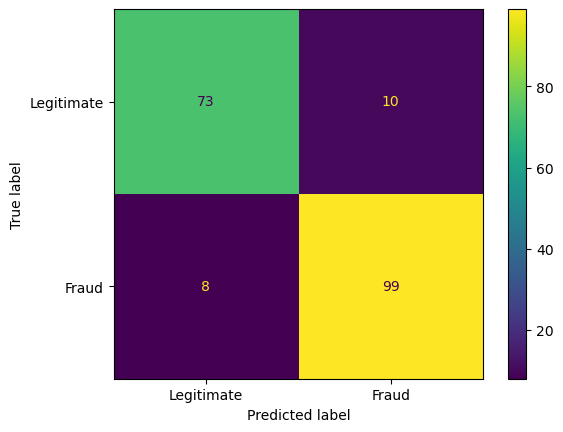

In [114]:
dtc_gn = DecisionTreeClassifier(criterion = 'gini')
model_gn = dtc_gn.fit(X_train, y_train)
ypred_gn = model_gn.predict(X_test)
ypred_gn_train = model_gn.predict(X_train)
cm_gn = confusion_matrix(y_test, ypred_gn)
(ConfusionMatrixDisplay(confusion_matrix = cm_gn, display_labels = ['Legitimate', 'Fraud'])).plot()

In [115]:
df103 = score_card(df102, 'Decision Tree: Gini', ypred_gn, y_test, ypred_gn_train, y_train)
df103

,Model_name,Accuracy_Score_train,Precision_Score_train,Recall_Score_train,F1_Score_train,Accuracy_Score_test,Precision_Score_test,Recall_Score_test,F1_Score_test
0,Logistic Regression,0.949735,0.951628,0.948844,0.949565,0.910526,0.909907,0.916507,0.910105
1,Decision Tree: Entropy,1.000000,1.000000,1.000000,1.000000,0.868421,0.868933,0.862910,0.865283
2,Decision Tree: Gini,1.000000,1.000000,1.000000,1.000000,0.905263,0.904746,0.902376,0.903455


# 4. Random Forest: GridSearchCV

In [116]:
from sklearn.model_selection import GridSearchCV as gscv
from sklearn.ensemble import RandomForestClassifier

In [117]:
htmodel_rf = gscv(RandomForestClassifier(random_state = 110), param_grid = {'n_estimators': [50, 80, 100, 150, 200],
                                                       'max_features': ['auto', 'sqrt', 'log2'],
                                                       'max_depth' : [4,5,6,7,8],
                                                       'criterion' :['gini', 'entropy']}, cv = 5)

In [118]:
htmodel_rf.fit(X,y)
print(htmodel_rf.best_params_)

{'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 50}


In [119]:
model_gscv_rf = RandomForestClassifier(criterion = htmodel_rf.best_params_.get('criterion'),
                                       n_estimators = htmodel_rf.best_params_.get('n_estimators'),
                                       max_depth = htmodel_rf.best_params_.get('max_depth'),
                                       max_features = htmodel_rf.best_params_.get('max_features')).fit(X_train, y_train)

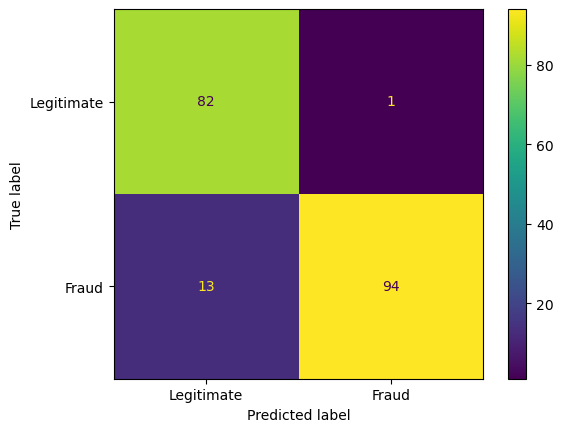

In [120]:
ypred_gscv_rf = model_gscv_rf.predict(X_test)
ypred_gscv_rf_train = model_gscv_rf.predict(X_train)
cm_gscv_rf = confusion_matrix(y_test, ypred_gscv_rf)
(ConfusionMatrixDisplay(confusion_matrix = cm_gscv_rf, display_labels = ['Legitimate', 'Fraud'])).plot()

In [121]:
df104 = score_card(df103, 'Random Forest: GridSearchCV', ypred_gscv_rf, y_test, ypred_gscv_rf_train, y_train) 
df104

,Model_name,Accuracy_Score_train,Precision_Score_train,Recall_Score_train,F1_Score_train,Accuracy_Score_test,Precision_Score_test,Recall_Score_test,F1_Score_test
0,Logistic Regression,0.949735,0.951628,0.948844,0.949565,0.910526,0.909907,0.916507,0.910105
1,Decision Tree: Entropy,1.000000,1.000000,1.000000,1.000000,0.868421,0.868933,0.862910,0.865283
2,Decision Tree: Gini,1.000000,1.000000,1.000000,1.000000,0.905263,0.904746,0.902376,0.903455
3,Random Forest: GridSearchCV,0.965608,0.968750,0.964481,0.965457,0.926316,0.926316,0.933228,0.926021


# 5. KNieghbors Classifier

In [122]:
from sklearn.neighbors import KNeighborsClassifier

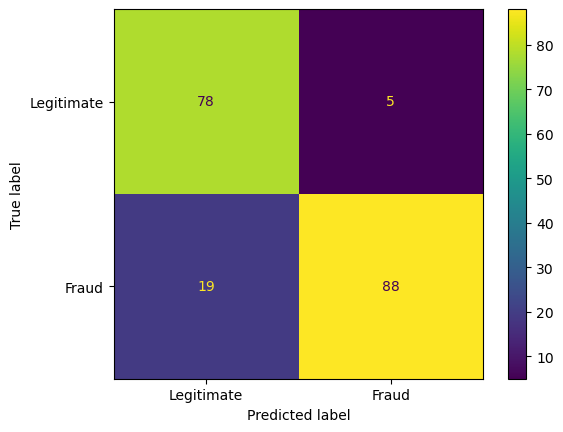

In [123]:
knc = KNeighborsClassifier()
model_knc = knc.fit(X_train, y_train)
ypred_knc = model_knc.predict(X_test)
ypred_knc_train = model_knc.predict(X_train)
cm_knc = confusion_matrix(y_test, ypred_knc)
(ConfusionMatrixDisplay(confusion_matrix = cm_knc, display_labels = ['Legitimate', 'Fraud'])).plot()

In [124]:
df105 = score_card(df104, 'KNeighbors Classifier', ypred_knc, y_test, ypred_knc_train, y_train)
df105

,Model_name,Accuracy_Score_train,Precision_Score_train,Recall_Score_train,F1_Score_train,Accuracy_Score_test,Precision_Score_test,Recall_Score_test,F1_Score_test
0,Logistic Regression,0.949735,0.951628,0.948844,0.949565,0.910526,0.909907,0.916507,0.910105
1,Decision Tree: Entropy,1.000000,1.000000,1.000000,1.000000,0.868421,0.868933,0.862910,0.865283
2,Decision Tree: Gini,1.000000,1.000000,1.000000,1.000000,0.905263,0.904746,0.902376,0.903455
3,Random Forest: GridSearchCV,0.965608,0.968750,0.964481,0.965457,0.926316,0.926316,0.933228,0.926021
4,KNeighbors Classifier,0.947090,0.950042,0.945944,0.946857,0.873684,0.875180,0.881094,0.873333


# 6. Bagging Classifier

In [125]:
from sklearn.ensemble import BaggingClassifier

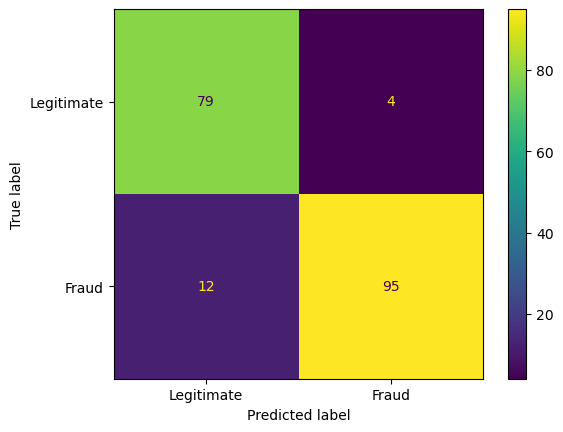

In [126]:
bg = BaggingClassifier(n_estimators = 80, random_state = 102)
model_bg = bg.fit(X_train, y_train)
ypred_bg = model_bg.predict(X_test)
ypred_bg_train = model_bg.predict(X_train)
cm_bg = confusion_matrix(y_test, ypred_bg)
(ConfusionMatrixDisplay(confusion_matrix = cm_bg, display_labels = ['Legitimate', 'Fraud'])).plot()

In [127]:
df106 = score_card(df105, 'Bagging Classifier', ypred_bg, y_test, ypred_bg_train, y_train)
df106

,Model_name,Accuracy_Score_train,Precision_Score_train,Recall_Score_train,F1_Score_train,Accuracy_Score_test,Precision_Score_test,Recall_Score_test,F1_Score_test
0,Logistic Regression,0.949735,0.951628,0.948844,0.949565,0.910526,0.909907,0.916507,0.910105
1,Decision Tree: Entropy,1.000000,1.000000,1.000000,1.000000,0.868421,0.868933,0.862910,0.865283
2,Decision Tree: Gini,1.000000,1.000000,1.000000,1.000000,0.905263,0.904746,0.902376,0.903455
3,Random Forest: GridSearchCV,0.965608,0.968750,0.964481,0.965457,0.926316,0.926316,0.933228,0.926021
4,KNeighbors Classifier,0.947090,0.950042,0.945944,0.946857,0.873684,0.875180,0.881094,0.873333
5,Bagging Classifier,1.000000,1.000000,1.000000,1.000000,0.915789,0.913864,0.919829,0.915188


# 7. SVM

In [128]:
from sklearn.svm import SVC

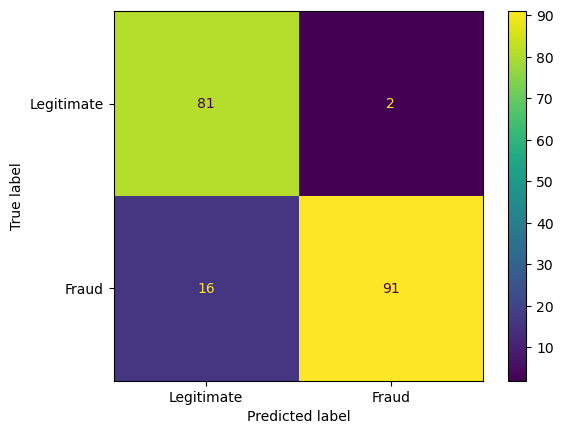

In [129]:
svm = SVC(kernel = 'sigmoid')
model_svm = svm.fit(X_train, y_train)
ypred_svm = model_svm.predict(X_test)
ypred_svm_train = model_svm.predict(X_train)
cm_svm = confusion_matrix(y_test, ypred_svm)
(ConfusionMatrixDisplay(confusion_matrix = cm_svm, display_labels = ['Legitimate', 'Fraud'])).plot()

In [130]:
df107 = score_card(df106, 'SVM', ypred_svm, y_test, ypred_svm_train, y_train)
df107

,Model_name,Accuracy_Score_train,Precision_Score_train,Recall_Score_train,F1_Score_train,Accuracy_Score_test,Precision_Score_test,Recall_Score_test,F1_Score_test
0,Logistic Regression,0.949735,0.951628,0.948844,0.949565,0.910526,0.909907,0.916507,0.910105
1,Decision Tree: Entropy,1.000000,1.000000,1.000000,1.000000,0.868421,0.868933,0.862910,0.865283
2,Decision Tree: Gini,1.000000,1.000000,1.000000,1.000000,0.905263,0.904746,0.902376,0.903455
3,Random Forest: GridSearchCV,0.965608,0.968750,0.964481,0.965457,0.926316,0.926316,0.933228,0.926021
4,KNeighbors Classifier,0.947090,0.950042,0.945944,0.946857,0.873684,0.875180,0.881094,0.873333
5,Bagging Classifier,1.000000,1.000000,1.000000,1.000000,0.915789,0.913864,0.919829,0.915188
6,SVM,0.928571,0.934067,0.926902,0.928088,0.905263,0.906773,0.913185,0.905000


# 8. AdaBoost Classifier

In [131]:
from sklearn.ensemble import AdaBoostClassifier

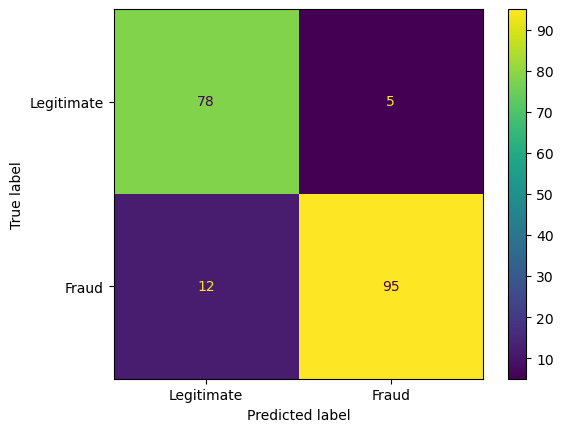

In [132]:
ab = AdaBoostClassifier(n_estimators = 10, random_state = 102)
model_ab = ab.fit(X_train, y_train)
ypred_ab = model_ab.predict(X_test)
ypred_ab_train = model_ab.predict(X_train)
cm_ab = confusion_matrix(y_test, ypred_ab)
(ConfusionMatrixDisplay(confusion_matrix = cm_ab, display_labels = ['Legitimate', 'Fraud'])).plot()

In [133]:
df108 = score_card(df107, 'AdaBoost Classifier', ypred_ab, y_test, ypred_ab_train, y_train)
df108

,Model_name,Accuracy_Score_train,Precision_Score_train,Recall_Score_train,F1_Score_train,Accuracy_Score_test,Precision_Score_test,Recall_Score_test,F1_Score_test
0,Logistic Regression,0.949735,0.951628,0.948844,0.949565,0.910526,0.909907,0.916507,0.910105
1,Decision Tree: Entropy,1.000000,1.000000,1.000000,1.000000,0.868421,0.868933,0.862910,0.865283
2,Decision Tree: Gini,1.000000,1.000000,1.000000,1.000000,0.905263,0.904746,0.902376,0.903455
3,Random Forest: GridSearchCV,0.965608,0.968750,0.964481,0.965457,0.926316,0.926316,0.933228,0.926021
4,KNeighbors Classifier,0.947090,0.950042,0.945944,0.946857,0.873684,0.875180,0.881094,0.873333
5,Bagging Classifier,1.000000,1.000000,1.000000,1.000000,0.915789,0.913864,0.919829,0.915188
6,SVM,0.928571,0.934067,0.926902,0.928088,0.905263,0.906773,0.913185,0.905000
7,AdaBoost Classifier,0.953704,0.954420,0.953195,0.953604,0.910526,0.908333,0.913805,0.909804


# 9. XGBoost Classifier

In [134]:
import xgboost
from xgboost import XGBClassifier

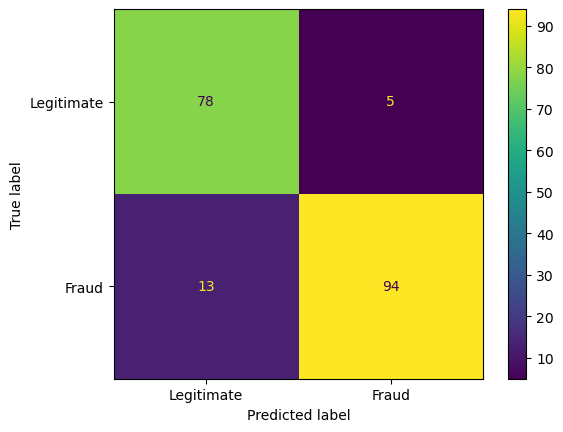

In [135]:
xgb = XGBClassifier(n_estimators = 20, random_state = 102)
model_xgb = xgb.fit(X_train, y_train)
ypred_xgb = model_xgb.predict(X_test)
ypred_xgb_train = model_xgb.predict(X_train)
cm_xgb = confusion_matrix(y_test, ypred_xgb)
(ConfusionMatrixDisplay(confusion_matrix = cm_xgb, display_labels = ['Legitimate', 'Fraud'])).plot()

In [136]:
df109 = score_card(df108, 'XGBoost Classifier', ypred_xgb, y_test, ypred_xgb_train, y_train)
df109

,Model_name,Accuracy_Score_train,Precision_Score_train,Recall_Score_train,F1_Score_train,Accuracy_Score_test,Precision_Score_test,Recall_Score_test,F1_Score_test
0,Logistic Regression,0.949735,0.951628,0.948844,0.949565,0.910526,0.909907,0.916507,0.910105
1,Decision Tree: Entropy,1.000000,1.000000,1.000000,1.000000,0.868421,0.868933,0.862910,0.865283
2,Decision Tree: Gini,1.000000,1.000000,1.000000,1.000000,0.905263,0.904746,0.902376,0.903455
3,Random Forest: GridSearchCV,0.965608,0.968750,0.964481,0.965457,0.926316,0.926316,0.933228,0.926021
4,KNeighbors Classifier,0.947090,0.950042,0.945944,0.946857,0.873684,0.875180,0.881094,0.873333
5,Bagging Classifier,1.000000,1.000000,1.000000,1.000000,0.915789,0.913864,0.919829,0.915188
6,SVM,0.928571,0.934067,0.926902,0.928088,0.905263,0.906773,0.913185,0.905000
7,AdaBoost Classifier,0.953704,0.954420,0.953195,0.953604,0.910526,0.908333,0.913805,0.909804
8,XGBoost Classifier,0.998677,0.998721,0.998634,0.998676,0.905263,0.903319,0.909132,0.904587


# 10. Naive Bayes: Binomial

In [137]:
from sklearn.naive_bayes import BernoulliNB

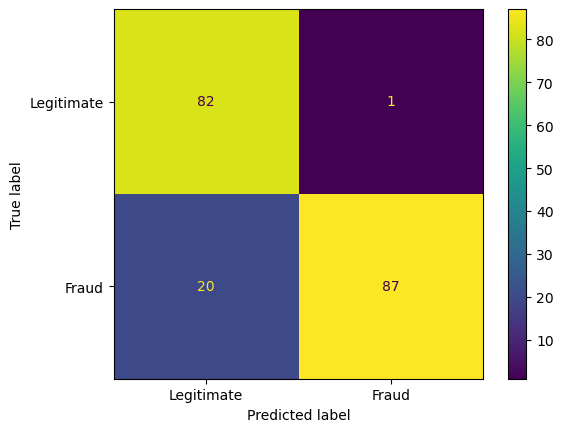

In [138]:
bnb = BernoulliNB()
model_bnb = bnb.fit(X_train, y_train)
ypred_bnb = model_bnb.predict(X_test)
ypred_bnb_train = model_bnb.predict(X_train)
cm_bnb = confusion_matrix(y_test, ypred_bnb)
(ConfusionMatrixDisplay(confusion_matrix = cm_bnb, display_labels = ['Legitimate', 'Fraud'])).plot()

In [139]:
df110 = score_card(df109, 'Naive Bayes: Bernoulli', ypred_bnb, y_test, ypred_bnb_train, y_train)
df110

,Model_name,Accuracy_Score_train,Precision_Score_train,Recall_Score_train,F1_Score_train,Accuracy_Score_test,Precision_Score_test,Recall_Score_test,F1_Score_test
0,Logistic Regression,0.949735,0.951628,0.948844,0.949565,0.910526,0.909907,0.916507,0.910105
1,Decision Tree: Entropy,1.000000,1.000000,1.000000,1.000000,0.868421,0.868933,0.862910,0.865283
2,Decision Tree: Gini,1.000000,1.000000,1.000000,1.000000,0.905263,0.904746,0.902376,0.903455
3,Random Forest: GridSearchCV,0.965608,0.968750,0.964481,0.965457,0.926316,0.926316,0.933228,0.926021
4,KNeighbors Classifier,0.947090,0.950042,0.945944,0.946857,0.873684,0.875180,0.881094,0.873333
5,Bagging Classifier,1.000000,1.000000,1.000000,1.000000,0.915789,0.913864,0.919829,0.915188
6,SVM,0.928571,0.934067,0.926902,0.928088,0.905263,0.906773,0.913185,0.905000
7,AdaBoost Classifier,0.953704,0.954420,0.953195,0.953604,0.910526,0.908333,0.913805,0.909804
8,XGBoost Classifier,0.998677,0.998721,0.998634,0.998676,0.905263,0.903319,0.909132,0.904587
9,Naive Bayes: Bernoulli,0.908730,0.922202,0.905990,0.907505,0.889474,0.896279,0.900518,0.889397


# Check the results of trained model

We will check with Random Forest GridSearchCV Model, because of its high accuracy on train and test data both.

In [246]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283721,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
283722,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
283723,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
283724,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [141]:
# Give input as an array
array = np.array([4462, -2.303349568, 1.75924746, -0.359744743, 2.330243051, -0.821628328, -0.075787571, 0.562319782, 
                  -0.399146578, -0.238253368, -1.525411627, 2.032912158, -6.560124295, 0.022937323, -1.470101536, -0.698826069,
                  -2.282193829, -4.781830856, -2.615664945, -1.334441067, -0.430021867, -0.294166318, -0.932391057, 0.172726296,
                  -0.087329538, -0.156114265, -0.542627889, 0.039565989, -0.153028797, 239.93

])

# Perform standard sclaer
scaled = ss.transform(array.reshape(1,-1))

# Convert an array to dataframe
sc_df = pd.DataFrame(scaled.reshape(1,30), columns = scale.columns)
sc_df

# Prediction
ypred = model_gscv_rf.predict(sc_df)

if ypred == 0:
    print('Prediction is: {}'.format(ypred))
    print('Customer is legitimate')
else:
    print('Prediction is: {}'.format(ypred))
    print('Customer is fraud')

Prediction is: [1]
Customer is fraud


# Conclusion:

In this task, we built a smart system to detect fraudulent credit card transactions. By using various classification algorithms, we found that the Random Forest algorithm provided the best accuracy. With some smart features, we created a powerful model that effectively detected fraudulent transactions while minimizing errors. We also handled the data imbalance and preprocessed the data effectively. However, we can further improve the model by fine-tuning some settings, trying out different approaches, and incorporating more data about fraudulent transactions.